In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import collections

df = pd.read_csv('D:/kaggle/T20_matches_ball_by_ball_data.csv', parse_dates=["date"], low_memory=False)

In [2]:
pak_team_matches = df[(df['team']=='Pakistan') | (df['team2']=='Pakistan')]
pak_match_ids = pak_team_matches['Match_Id'].unique()
winner = df[df['winner'] == 'Pakistan'] 
pak_win = len(winner['Match_Id'].unique())

In [3]:
all_teams = df['team'].unique().tolist()

In [4]:
winning_pct = {}
for team in all_teams:
    team_matches = df[(df['team']== team ) | (df['team2']== team )]
    team_match_ids = team_matches['Match_Id'].unique()
    total_matches = len(team_match_ids)
    df_winnings = df[df['winner'] == team] 
    total_wins = len(df_winnings['Match_Id'].unique())
    winning_pct[team] = int(total_wins)/int(total_matches)*100
    
winning_pct_sorted = sorted(winning_pct.items(), key=operator.itemgetter(1))
winning_pct_sorted = collections.OrderedDict(winning_pct_sorted)


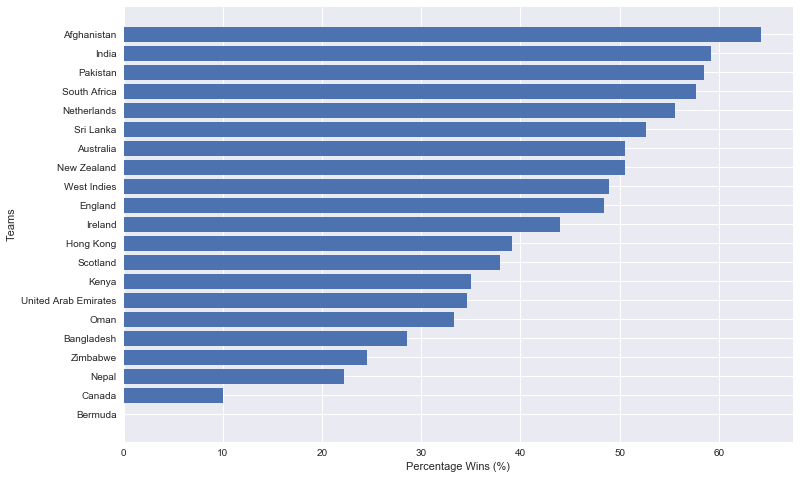

In [26]:
plt.barh(range(len(winning_pct_sorted)), list(winning_pct_sorted.values()), align='center')
plt.yticks(range(len(winning_pct_sorted)), list(winning_pct_sorted.keys()))
plt.xlabel('Percentage Wins (%)')
plt.ylabel('Teams')
plt.show()

In [5]:
# Afghanistan and Netherlands are in the top winning teams ?
# How is it possible because they are not good teams.
# Let's dive in to see which teams have played against them
df_afghanistan_wins = df[df['winner'] == 'Afghanistan']
afghanistan_wins_match_ids = df_afghanistan_wins['Match_Id'].unique() # list of winning matches
afg_opp1 = df_afghanistan_wins[df_afghanistan_wins['team'] != 'Afghanistan']['team'].unique() # get unique teams in 1st col
afg_opp2 = df_afghanistan_wins[df_afghanistan_wins['team2'] != 'Afghanistan']['team2'].unique() # get unique teams in 2nd col
set(list(afg_opp1) + list(afg_opp2)) # Unique set of Afghanistan opponents with whom against they won.
# So now it is clear that why they have such a high rate of winnigs.
# Their most matches are against low ranked countries against whom they won easily.
# Similary it can be done with Netherlands as well by changing Afghanistan to Netherlands

{'Canada',
 'Hong Kong',
 'Ireland',
 'Kenya',
 'Netherlands',
 'Oman',
 'Papua New Guinea',
 'Scotland',
 'United Arab Emirates',
 'West Indies',
 'Zimbabwe'}

In [8]:
# Top 5 Batsman of T20 cricket in each team
df_sub = df[['Striker', 'Run_Scored', 'Batting_Team']]
df_sub['Run_Scored'] = df_sub['Run_Scored'].astype(int)
x = df_sub.pivot_table(index='Striker', columns='Batting_Team', aggfunc=sum)

top5players = {}
for team in all_teams:
    y = x['Run_Scored'][team]
    y = y.dropna()
    top5players[team] = dict(y.sort_values(ascending=False)[:5])


c:\users\azfar\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


c:\users\azfar\python\python35\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


ValueError: could not convert string to float: 'A Bagai'

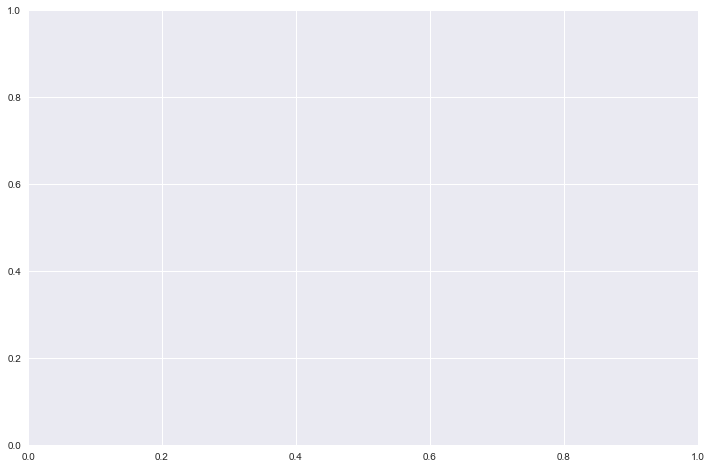

In [18]:
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates


df_plot = pd.DataFrame(top5players).stack().reset_index()
df_plot.columns = ['Player Name', 'Country', 'Total Score']
parallel_coordinates(df_plot, class_column='Country')
